## 5.1数据处理

In [15]:
%env LS_COLORS = None
!tree --charset ascii data/dogcat/

env: LS_COLORS=None
data/dogcat/
|-- cat.12484.jpg
|-- cat.12485.jpg
|-- cat.12486.jpg
|-- cat.12487.jpg
|-- dog.12496.jpg
|-- dog.12497.jpg
|-- dog.12498.jpg
`-- dog.12499.jpg

0 directories, 8 files


In [16]:
import torch as t
from torch.utils import data
from torchvision import transforms as T

In [17]:
import os 
from PIL import Image
import numpy as np
transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[.5, .5, .5], std = [.5, .5, .5])
    ])


class DogCat(data.Dataset):
    
    def __init__(self, root, transforms = None):
        #print(root)
        imgs = os.listdir(root)
        #print(imgs)
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
    
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 1 if 'dog' in img_path.split('/')[-1] else 0
        data =Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
            
        return data, label
    
    def __len__(self):
        return len(self.imgs)

In [18]:
dataset = DogCat('./data/dogcat/', transforms=transform )
img, label = dataset[0]
print(len(dataset))
for img, label in dataset:
    print(img.size(), label)

8
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1


In [19]:
!tree data/dogcat_2/

data/dogcat_2/
├── cat
│   ├── cat.12484.jpg
│   ├── cat.12485.jpg
│   ├── cat.12486.jpg
│   └── cat.12487.jpg
└── dog
    ├── dog.12496.jpg
    ├── dog.12497.jpg
    ├── dog.12498.jpg
    └── dog.12499.jpg

2 directories, 8 files


In [20]:
from torchvision.datasets import ImageFolder

dataset = ImageFolder('data/dogcat_2/')

In [21]:
dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [22]:
dataset.imgs

[('data/dogcat_2/cat/cat.12484.jpg', 0),
 ('data/dogcat_2/cat/cat.12485.jpg', 0),
 ('data/dogcat_2/cat/cat.12486.jpg', 0),
 ('data/dogcat_2/cat/cat.12487.jpg', 0),
 ('data/dogcat_2/dog/dog.12496.jpg', 1),
 ('data/dogcat_2/dog/dog.12497.jpg', 1),
 ('data/dogcat_2/dog/dog.12498.jpg', 1),
 ('data/dogcat_2/dog/dog.12499.jpg', 1)]

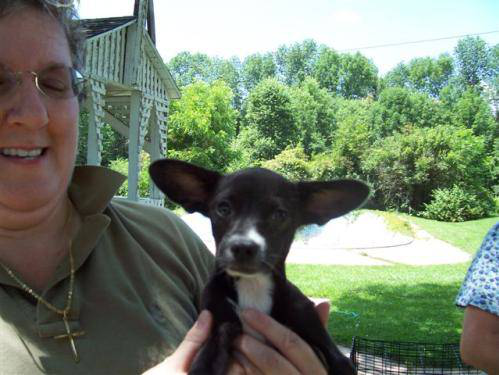

In [23]:
dataset[4][0]

命名规则： {'cat': 0, 'dog': 1}
label:  0


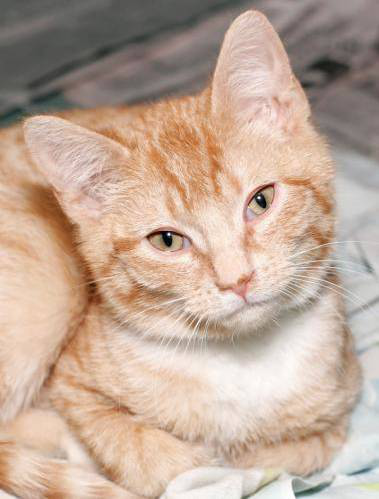

In [24]:
print("命名规则：", dataset.class_to_idx)
print("label: ", dataset[1][1])
dataset[1][0]

In [25]:
normalize = T.Normalize(mean = [0.4, 0.4, 0.4], std=[0.2, 0.2, 0.2])
transform = T.Compose([
    T.RandomCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize
])

dataset = ImageFolder("data/dogcat_2/", transform=transform)

In [30]:
dataset[0][0].size()

torch.Size([3, 224, 224])

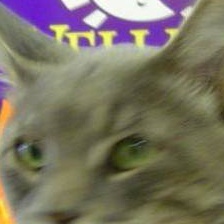

In [32]:
to_img = T.ToPILImage()
to_img(dataset[0][0]*0.2 + 0.4)

In [33]:
from torch.utils.data import DataLoader

In [34]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True, num_workers=0)


In [42]:
dataiter = iter(dataloader)
print(dataiter.timeout)
imgs, labels = next(dataiter)
imgs.size()

0


torch.Size([3, 3, 224, 224])

In [59]:
class NewDogCat(DogCat):
    #重新书写父类的方法
    def __getitem__(self, index):
        try:
            return super(NewDogCat, self).__getitem__(index)
        except:
            return None, None
from torch.utils.data.dataloader import default_collate
def my_collate_fn(bathch):
    batch = list(filter(lambda x:x[0] is not None, batch))
    if len(batch) == 0: return t.Tensor()
    return default_collate(batch)

In [60]:
dataset = NewDogCat('data/dogcat_wrong/', transforms=transform)
dataset.imgs

['data/dogcat_wrong/cat.12485.jpg',
 'data/dogcat_wrong/dog.wrong.jpg',
 'data/dogcat_wrong/dog.12499.jpg',
 'data/dogcat_wrong/cat.12486.jpg',
 'data/dogcat_wrong/cat.12484.jpg',
 'data/dogcat_wrong/dog.12498.jpg',
 'data/dogcat_wrong/cat.12487.jpg',
 'data/dogcat_wrong/dog.12496.jpg',
 'data/dogcat_wrong/dog.12497.jpg']

## 5.2 可视化

计算机视觉是深度学习中最重要的一类应用，为了方便研究者使用，PyTorch团队专门开发了一个视觉工具包`torchvion`，这个包独立于PyTorch，需通过`pip instal torchvision`安装。在之前的例子中我们已经见识到了它的部分功能，这里再做一个系统性的介绍。torchvision主要包含三部分：

- models：提供深度学习中各种经典网络的网络结构以及预训练好的模型，包括`AlexNet`、VGG系列、ResNet系列、Inception系列等。
- datasets： 提供常用的数据集加载，设计上都是继承`torhc.utils.data.Dataset`，主要包括`MNIST`、`CIFAR10/100`、`ImageNet`、`COCO`等。
- transforms：提供常用的数据预处理操作，主要包括对Tensor以及PIL Image对象的操作。

In [151]:
from torchvision import models
from torch import nn

resnet34 = models.squeezenet1_1(pretrained=True, num_classes = 1000)
resnet34.fc = nn.Linear(512, 10)

In [152]:
transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize((0.1307,), (0.3081,))
    ])

In [153]:
from torchvision import datasets
dataset = datasets.MNIST('data/', download=True, train=False, transform=transform)

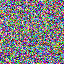

In [154]:
from torchvision import transforms
to_pil = transforms.ToPILImage()
to_pil(t.randn(3, 64, 64))

In [155]:
dataloader = DataLoader(dataset, shuffle = True, batch_size=16)

label: tensor([2, 1, 8, 5, 6, 0, 4, 1, 5, 9, 9, 4, 2, 6, 8, 2])
image shape: torch.Size([3, 906, 906])


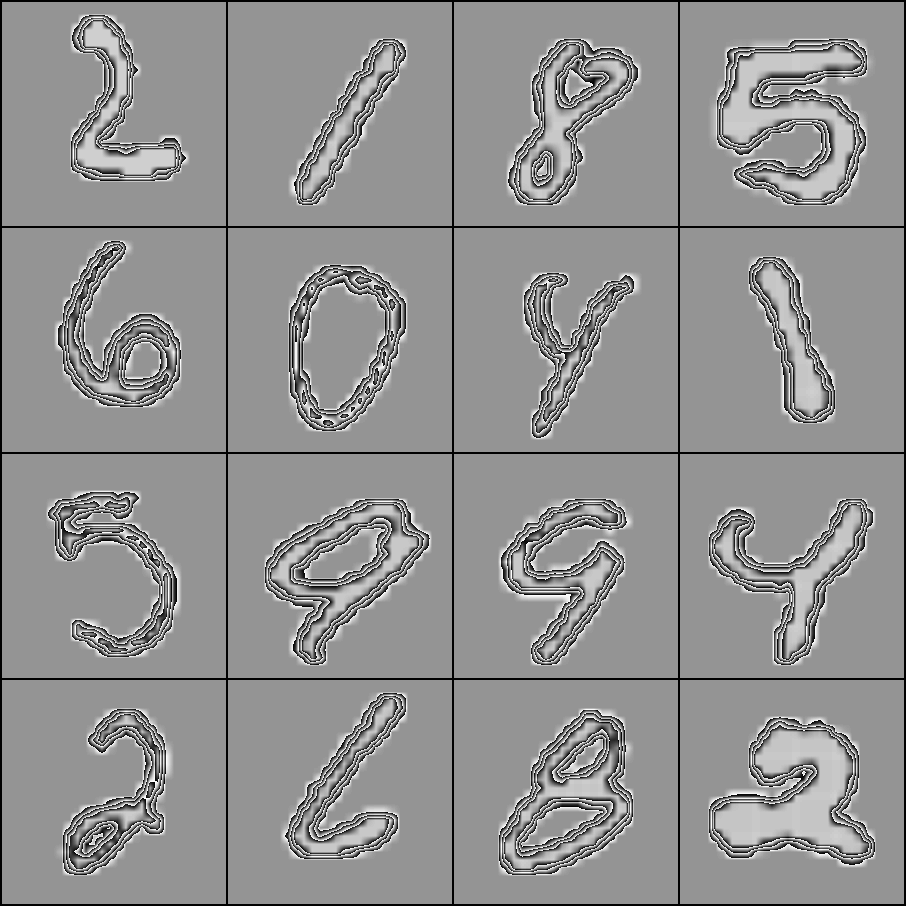

In [164]:
from torchvision.utils import make_grid, save_image
dataiter = iter(dataloader)
img , label = next(dataiter)
img = make_grid(img, 4)
print("label:", label)
print("image shape:", img.shape)
# print((next(dataiter)[1]))
# img = make_grid(next(dataiter)[0], 4)
to_img(img)

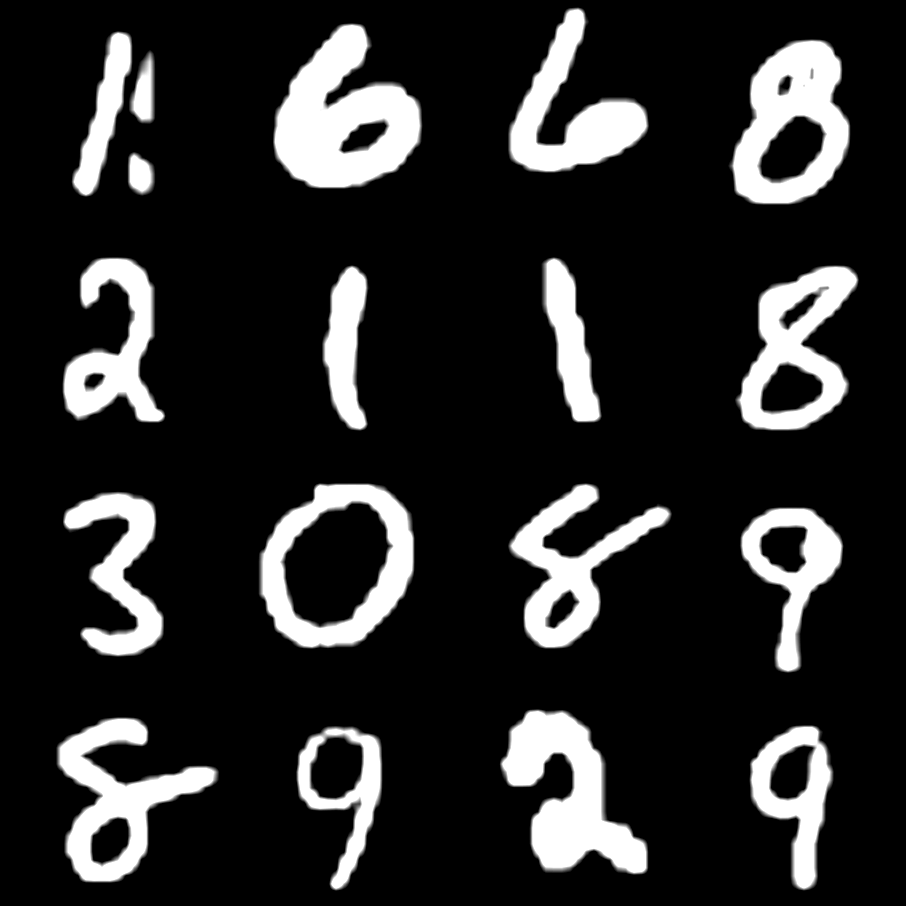

In [157]:
save_image(img, "aaa.png")
Image.open("aaa.png")

### visdom学习

In [165]:
%%sh

UsageError: %%sh is a cell magic, but the cell body is empty.


In [218]:
import torch as t
import visdom


#新建一个客户端
vis = visdom.Visdom(use_incoming_socket=False)

x = t.arange(0, 30, 0.01)
y = t.sin(x)
vis.line(X=x, Y=y, win = 'sinx', opts = {"title":'y=sin(x)', "xlabel":"x轴",
                                        "ylabel":"y轴"})

'sinx'

In [219]:
#追加数据
for ii in range(0, 10):
    x = t.Tensor([ii])
    y = x
    vis.line(X=x, Y=y, win="polynomial", name="this is a line",update="append" if ii>0 else None)
    
    
x = t.arange(0, 9, 0.1)
y = (x**2) / 9    
vis.line(X=x, Y=y, win="polynomial", name="this is a new, Trace", update="new")

'polynomial'

In [220]:
vis.image(t.randn(64, 64).numpy())

vis.image(t.randn(3, 64, 64).numpy(), win="random2")

vis.images(t.randn(36, 3, 64, 64), nrow=6, win="random3", opts={"title":"random_imgs"})

'random3'

In [221]:
vis.text("sds", win="visdom", opts={"title":"visdom 简介"})

'visdom'

### tensorboard学习
```
TensorFlow 附加的工具Tensorboard 是一个很好用的视觉化工具。他可以记录数字，影像或者是声音资讯，对于观察类神经网路训练的过程非常有帮助。很可惜的是其他的训练框架（PyTorch, Chainer, numpy）并没有这么好用的工具。tensorboardX 的目的就是让其他tensorboard 的功能都可以轻易的被非TensorFlow 的框架使用.
```
[链接](https://www.cnblogs.com/kk17/p/10077335.html)

In [1]:
import numpy as np
from tensorboardX import SummaryWriter

writer = SummaryWriter(comment="base_scalar")
for eporch in range(100):
    #1.title 2.y轴　３．x轴
    writer.add_scalar('scalar/test', np.random.rand(), eporch)
    #当y轴的值不止一个时，add_scalarste
    writer.add_scalars('scalar/scalars_test', {"xsinx":eporch*np.sin(eporch),
                                              "xcosx":eporch * np.cos(eporch)},
                      eporch)

    writer.close()

In [2]:
#实例
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorboardX import SummaryWriter


class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.bn = nn.BatchNorm2d(20)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(x) + F.relu(-x)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x


dummy_input = torch.rand(13, 1, 28, 28)

model = Net1()
with SummaryWriter(comment='Net1') as w:
    w.add_graph(model, (dummy_input,))

Epoch 5/6000,loss:0.5534
Epoch 10/6000,loss:0.5437
Epoch 15/6000,loss:0.5341
Epoch 20/6000,loss:0.5249
Epoch 25/6000,loss:0.5158
Epoch 30/6000,loss:0.5070
Epoch 35/6000,loss:0.4984
Epoch 40/6000,loss:0.4901
Epoch 45/6000,loss:0.4819
Epoch 50/6000,loss:0.4740
Epoch 55/6000,loss:0.4662
Epoch 60/6000,loss:0.4587
Epoch 65/6000,loss:0.4513
Epoch 70/6000,loss:0.4442
Epoch 75/6000,loss:0.4372
Epoch 80/6000,loss:0.4304
Epoch 85/6000,loss:0.4237
Epoch 90/6000,loss:0.4173
Epoch 95/6000,loss:0.4110
Epoch 100/6000,loss:0.4048
Epoch 105/6000,loss:0.3988
Epoch 110/6000,loss:0.3930
Epoch 115/6000,loss:0.3873
Epoch 120/6000,loss:0.3818
Epoch 125/6000,loss:0.3763
Epoch 130/6000,loss:0.3711
Epoch 135/6000,loss:0.3659
Epoch 140/6000,loss:0.3609
Epoch 145/6000,loss:0.3561
Epoch 150/6000,loss:0.3513
Epoch 155/6000,loss:0.3467
Epoch 160/6000,loss:0.3422
Epoch 165/6000,loss:0.3378
Epoch 170/6000,loss:0.3335
Epoch 175/6000,loss:0.3293
Epoch 180/6000,loss:0.3252
Epoch 185/6000,loss:0.3213
Epoch 190/6000,loss:0

Epoch 1950/6000,loss:0.1689
Epoch 1955/6000,loss:0.1689
Epoch 1960/6000,loss:0.1689
Epoch 1965/6000,loss:0.1689
Epoch 1970/6000,loss:0.1689
Epoch 1975/6000,loss:0.1689
Epoch 1980/6000,loss:0.1689
Epoch 1985/6000,loss:0.1689
Epoch 1990/6000,loss:0.1689
Epoch 1995/6000,loss:0.1689
Epoch 2000/6000,loss:0.1689
Epoch 2005/6000,loss:0.1689
Epoch 2010/6000,loss:0.1689
Epoch 2015/6000,loss:0.1689
Epoch 2020/6000,loss:0.1689
Epoch 2025/6000,loss:0.1689
Epoch 2030/6000,loss:0.1689
Epoch 2035/6000,loss:0.1689
Epoch 2040/6000,loss:0.1689
Epoch 2045/6000,loss:0.1689
Epoch 2050/6000,loss:0.1689
Epoch 2055/6000,loss:0.1689
Epoch 2060/6000,loss:0.1689
Epoch 2065/6000,loss:0.1689
Epoch 2070/6000,loss:0.1689
Epoch 2075/6000,loss:0.1689
Epoch 2080/6000,loss:0.1689
Epoch 2085/6000,loss:0.1689
Epoch 2090/6000,loss:0.1689
Epoch 2095/6000,loss:0.1689
Epoch 2100/6000,loss:0.1689
Epoch 2105/6000,loss:0.1689
Epoch 2110/6000,loss:0.1689
Epoch 2115/6000,loss:0.1689
Epoch 2120/6000,loss:0.1689
Epoch 2125/6000,loss

Epoch 3655/6000,loss:0.1689
Epoch 3660/6000,loss:0.1689
Epoch 3665/6000,loss:0.1689
Epoch 3670/6000,loss:0.1689
Epoch 3675/6000,loss:0.1689
Epoch 3680/6000,loss:0.1689
Epoch 3685/6000,loss:0.1689
Epoch 3690/6000,loss:0.1689
Epoch 3695/6000,loss:0.1689
Epoch 3700/6000,loss:0.1689
Epoch 3705/6000,loss:0.1689
Epoch 3710/6000,loss:0.1689
Epoch 3715/6000,loss:0.1689
Epoch 3720/6000,loss:0.1689
Epoch 3725/6000,loss:0.1689
Epoch 3730/6000,loss:0.1689
Epoch 3735/6000,loss:0.1689
Epoch 3740/6000,loss:0.1689
Epoch 3745/6000,loss:0.1689
Epoch 3750/6000,loss:0.1689
Epoch 3755/6000,loss:0.1689
Epoch 3760/6000,loss:0.1689
Epoch 3765/6000,loss:0.1689
Epoch 3770/6000,loss:0.1689
Epoch 3775/6000,loss:0.1689
Epoch 3780/6000,loss:0.1689
Epoch 3785/6000,loss:0.1689
Epoch 3790/6000,loss:0.1689
Epoch 3795/6000,loss:0.1689
Epoch 3800/6000,loss:0.1689
Epoch 3805/6000,loss:0.1689
Epoch 3810/6000,loss:0.1689
Epoch 3815/6000,loss:0.1689
Epoch 3820/6000,loss:0.1689
Epoch 3825/6000,loss:0.1689
Epoch 3830/6000,loss

Epoch 5365/6000,loss:0.1689
Epoch 5370/6000,loss:0.1689
Epoch 5375/6000,loss:0.1689
Epoch 5380/6000,loss:0.1689
Epoch 5385/6000,loss:0.1689
Epoch 5390/6000,loss:0.1689
Epoch 5395/6000,loss:0.1689
Epoch 5400/6000,loss:0.1689
Epoch 5405/6000,loss:0.1689
Epoch 5410/6000,loss:0.1689
Epoch 5415/6000,loss:0.1689
Epoch 5420/6000,loss:0.1689
Epoch 5425/6000,loss:0.1689
Epoch 5430/6000,loss:0.1689
Epoch 5435/6000,loss:0.1689
Epoch 5440/6000,loss:0.1689
Epoch 5445/6000,loss:0.1689
Epoch 5450/6000,loss:0.1689
Epoch 5455/6000,loss:0.1689
Epoch 5460/6000,loss:0.1689
Epoch 5465/6000,loss:0.1689
Epoch 5470/6000,loss:0.1689
Epoch 5475/6000,loss:0.1689
Epoch 5480/6000,loss:0.1689
Epoch 5485/6000,loss:0.1689
Epoch 5490/6000,loss:0.1689
Epoch 5495/6000,loss:0.1689
Epoch 5500/6000,loss:0.1689
Epoch 5505/6000,loss:0.1689
Epoch 5510/6000,loss:0.1689
Epoch 5515/6000,loss:0.1689
Epoch 5520/6000,loss:0.1689
Epoch 5525/6000,loss:0.1689
Epoch 5530/6000,loss:0.1689
Epoch 5535/6000,loss:0.1689
Epoch 5540/6000,loss

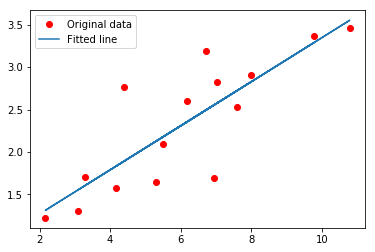

In [6]:
import torch
import torch.nn as nn
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np

input_size = 1
output_size = 1
num_epoches = 6000
learning_rate = 0.01
writer = SummaryWriter(comment='Linear')
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    output = model(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 保存loss的数据与epoch数值
    writer.add_scalar('Train', loss, epoch)
    if (epoch + 1) % 5 == 0:
        print('Epoch {}/{},loss:{:.4f}'.format(epoch + 1, num_epoches, loss.item()))

# 将model保存为graph
writer.add_graph(model, (inputs,))

predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
writer.close()

In [11]:
from tensorboardX import SummaryWriter

with SummaryWriter('test/ine', comment='1111') as S:

    S.add_text("adajdajdl", "asjdlasjd")

## 5.3 GPU 加速

In [18]:
import torch as t
tensor = t.Tensor(3, 4)
tensor.is_cuda
tensor1 = tensor.cuda()#使用默认的GPU，即第零块GPU
tensor1.is_cuda

True

In [21]:
import torch.nn as nn
module = nn.Linear(3,4)
module.cuda(device = 0)
module.weight.is_cuda

True

In [40]:
class VeryBigModule(nn.Module):
    def __init__(self):
        super(VeryBigModule, self).__init__()
        self.get1 = nn.Parameter(t.rand(1000, 10000))
        self.get2 = nn.Parameter(t.rand(10000, 1000))
        
    def forward(self, x):
        x = self.get1.mm(x)
        x = self.get1.mm(x)
        
        return x

In [42]:
module = VeryBigModule()
module = module.cuda()
x = module(t.rand(10000, 10000).cuda())

RuntimeError: CUDA out of memory. Tried to allocate 382.00 MiB (GPU 0; 1.96 GiB total capacity; 733.88 MiB already allocated; 361.25 MiB free; 286.12 MiB cached)

In [46]:
criterion = nn.CrossEntropyLoss(weight=t.Tensor([1, 3]))
input = t.randn(4, 2).cuda()
target = t.Tensor([1, 0, 0, 1]).long().cuda()

#loss = criterion(input, target)#权重未投放到Ｇpu上
criterion.cuda()
loss = criterion(input, target)
criterion._buffers

OrderedDict([('weight', tensor([1., 3.], device='cuda:0'))])

### 存放数据

In [105]:
import torch as t
#指定GPU版本
x = t.cuda.FloatTensor(2, 3)
t = t.FloatTensor(2, 3).cuda()

# #指定默认的GPU
# a = t.cuda.FloatTensor(5, 1)
# b = t.FloatTensor(5, 1).cuda()
# print(a.get_device() == b.get_device())

In [110]:
import torch as t
t.set_default_tensor_type('torch.cuda.FloatTensor')
a = t.ones(2, 1)
a.get_device()

0

In [148]:
a = t.Tensor(3, 4)
#print("a", a)
if t.cuda.is_available():
    a = a.cuda(0)
    t.save(a, 'a.pth')
    b = t.load('a.pth')
    print(b.get_device())
    
    c = t.load("a.pth", map_location=lambda storage, loc:storage)

0


In [200]:
#设置默认
t.set_default_tensor_type("torch.FloatTensor")
from torchvision import models
model = models.SqueezeNet()

#保存数据
model.state_dict().keys()


odict_keys(['features.0.weight', 'features.0.bias', 'features.3.squeeze.weight', 'features.3.squeeze.bias', 'features.3.expand1x1.weight', 'features.3.expand1x1.bias', 'features.3.expand3x3.weight', 'features.3.expand3x3.bias', 'features.4.squeeze.weight', 'features.4.squeeze.bias', 'features.4.expand1x1.weight', 'features.4.expand1x1.bias', 'features.4.expand3x3.weight', 'features.4.expand3x3.bias', 'features.5.squeeze.weight', 'features.5.squeeze.bias', 'features.5.expand1x1.weight', 'features.5.expand1x1.bias', 'features.5.expand3x3.weight', 'features.5.expand3x3.bias', 'features.7.squeeze.weight', 'features.7.squeeze.bias', 'features.7.expand1x1.weight', 'features.7.expand1x1.bias', 'features.7.expand3x3.weight', 'features.7.expand3x3.bias', 'features.8.squeeze.weight', 'features.8.squeeze.bias', 'features.8.expand1x1.weight', 'features.8.expand1x1.bias', 'features.8.expand3x3.weight', 'features.8.expand3x3.bias', 'features.9.squeeze.weight', 'features.9.squeeze.bias', 'features.9.

In [160]:
#保存模型的数据
t.save(model.state_dict(), 'SquNet.pth')

In [161]:
#加载模型
model.load_state_dict(t.load('SquNet.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [193]:
optimizer = t.optim.Adam(model.parameters(), lr=0.1)

In [194]:
#保存优化后的结果
t.save(optimizer.state_dict(), "optim.pth")
optimizer.load_state_dict(t.load('optim.pth'))

In [195]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.1
    weight_decay: 0
)

In [171]:
#统一化存放数据
alldata = dict(
    optimizer = optimizer.state_dict(),
    model = model.state_dict(),
    info = "模型和优化器的所有参数"
)

In [173]:
t.save(alldata, "alll.pth")
alldata = t.load("alll.pth")

In [205]:
(alldata["info"])


'模型和优化器的所有参数'